In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_12_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_test = input_data[100000:,:]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_12_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_test = output_data[100000:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 6s - loss: 0.2409 - accuracy: 0.9033 - val_loss: 0.2048 - val_accuracy: 0.9159
Epoch 2/100
100000/100000 - 4s - loss: 0.1938 - accuracy: 0.9167 - val_loss: 0.1820 - val_accuracy: 0.9188
Epoch 3/100
100000/100000 - 4s - loss: 0.1704 - accuracy: 0.9236 - val_loss: 0.1583 - val_accuracy: 0.9274
Epoch 4/100
100000/100000 - 4s - loss: 0.1437 - accuracy: 0.9326 - val_loss: 0.1340 - val_accuracy: 0.9355
Epoch 5/100
100000/100000 - 4s - loss: 0.1225 - accuracy: 0.9415 - val_loss: 0.1168 - val_accuracy: 0.9440
Epoch 6/100
100000/100000 - 4s - loss: 0.1080 - accuracy: 0.9489 - val_loss: 0.1057 - val_accuracy: 0.9502
Epoch 7/100
100000/100000 - 4s - loss: 0.0968 - accuracy: 0.9550 - val_loss: 0.0974 - val_accuracy: 0.9539
Epoch 8/100
100000/100000 - 4s - loss: 0.0869 - accuracy: 0.9600 - val_loss: 0.0911 - val_accuracy: 0.9580
Epoch 9/100
100000/100000 - 4s - loss: 0.0786 - accuracy: 0.9644 - val_loss: 0.0822 - val_accu

Epoch 77/100
100000/100000 - 5s - loss: 0.0072 - accuracy: 0.9974 - val_loss: 0.0553 - val_accuracy: 0.9873
Epoch 78/100
100000/100000 - 5s - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0571 - val_accuracy: 0.9878
Epoch 79/100
100000/100000 - 5s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0598 - val_accuracy: 0.9872
Epoch 80/100
100000/100000 - 4s - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0648 - val_accuracy: 0.9862
Epoch 81/100
100000/100000 - 4s - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0652 - val_accuracy: 0.9854
Epoch 82/100
100000/100000 - 4s - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0576 - val_accuracy: 0.9869
Epoch 83/100
100000/100000 - 4s - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0592 - val_accuracy: 0.9871
Epoch 84/100
100000/100000 - 4s - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0590 - val_accuracy: 0.9876
Epoch 85/100
100000/100000 - 5s - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0605 - val_accuracy: 0.9878
Epoch 86/100
100000/100000 -

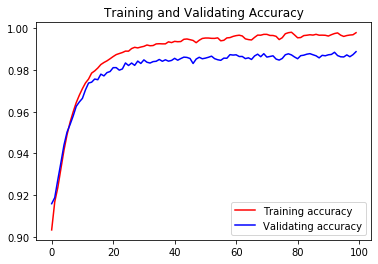

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_12_4_model.h5')